In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
from itertools import product
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


sys.path.extend([
    '../src',
    '../data',
    '../utils',
    '../plot'

])

from utils import run_nested_cv, create_sliding_windows, time_rf_inference_for_subject


if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

#limb
right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], 
                      ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-04 17:00:56.248981: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.409
New best HP found: {'activation': 'relu', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.433
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimi

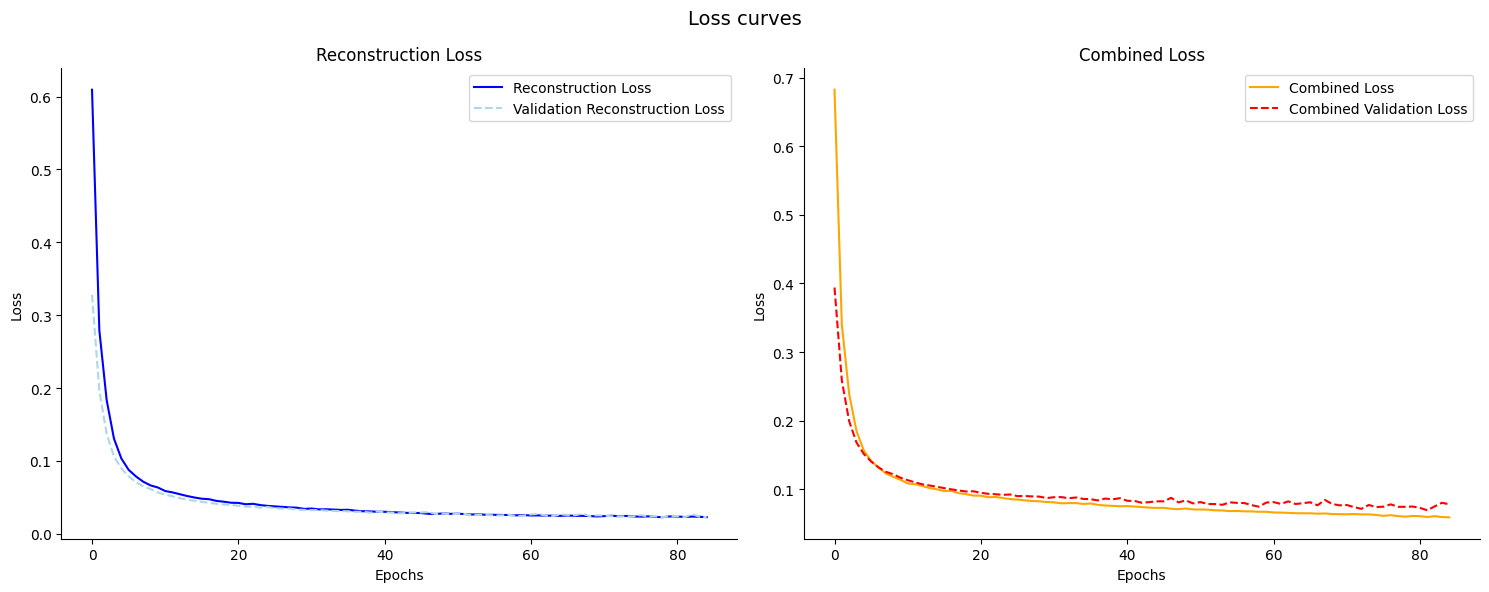

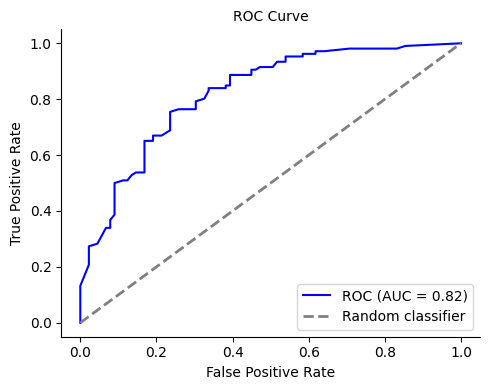

Limb: 2 Subject: 1 Youden Index: 0.4652321390714438 Sensitivity: 0.8584905660377359 Specificity: 0.6067415730337079
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.419
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.446


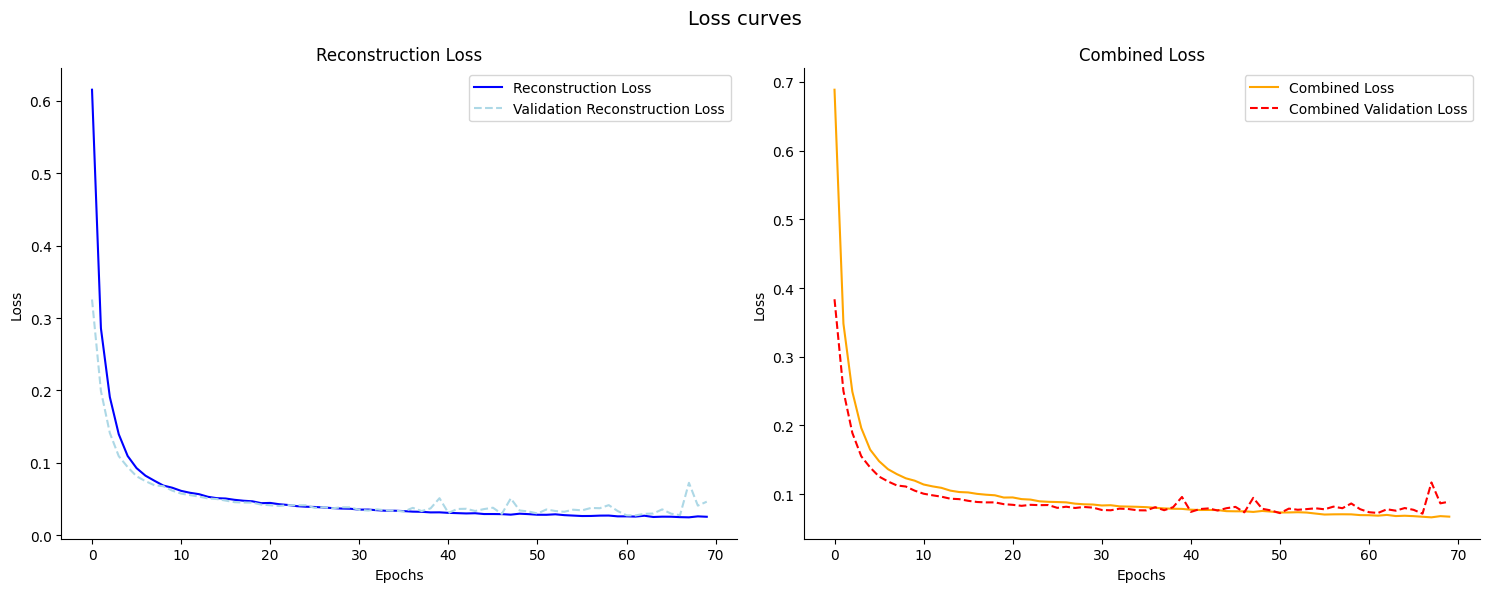

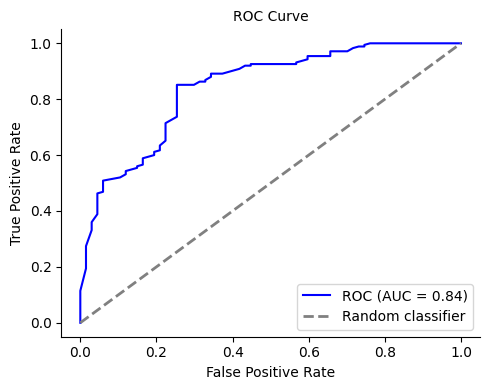

Limb: 2 Subject: 2 Youden Index: 0.5402132196162048 Sensitivity: 0.8685714285714285 Specificity: 0.6716417910447762
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.425
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.494


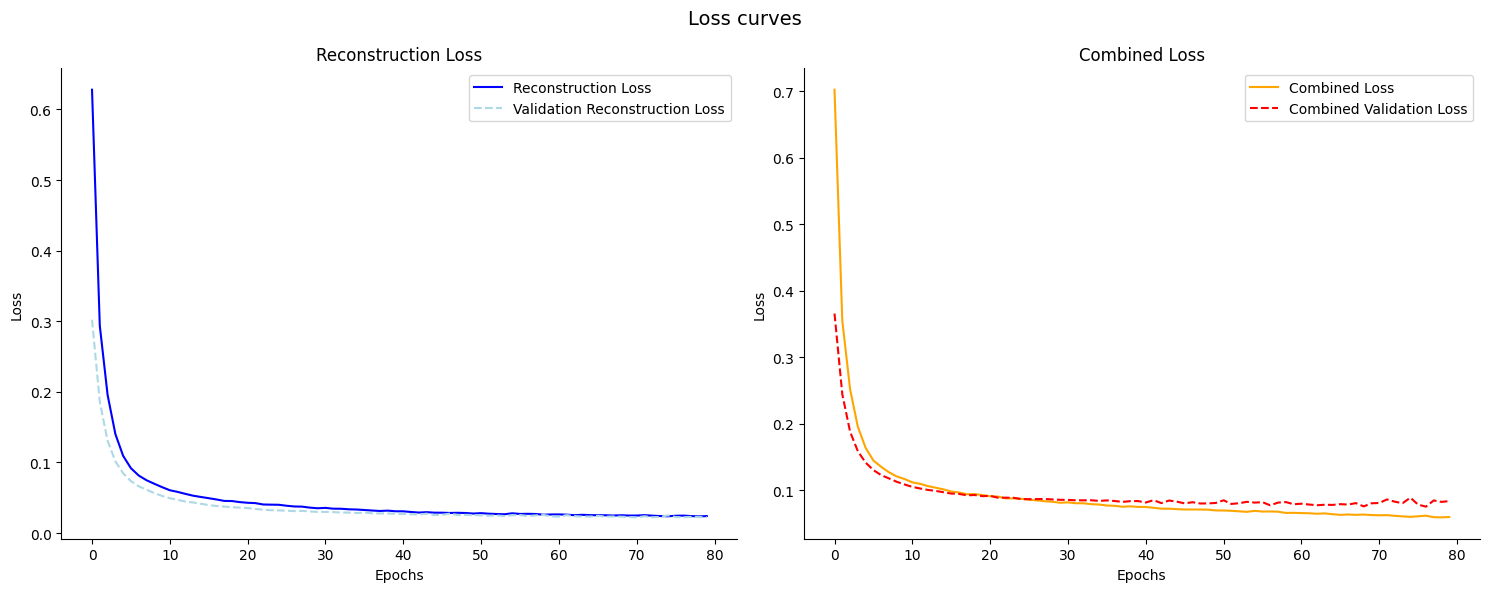

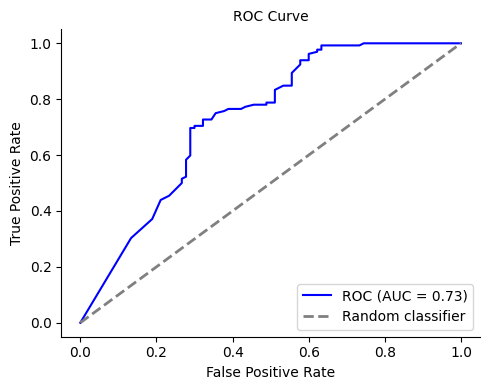

Limb: 2 Subject: 3 Youden Index: 0.2919191919191919 Sensitivity: 0.803030303030303 Specificity: 0.4888888888888889
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.432
New best HP found: {'activation': 'relu', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.434
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNo

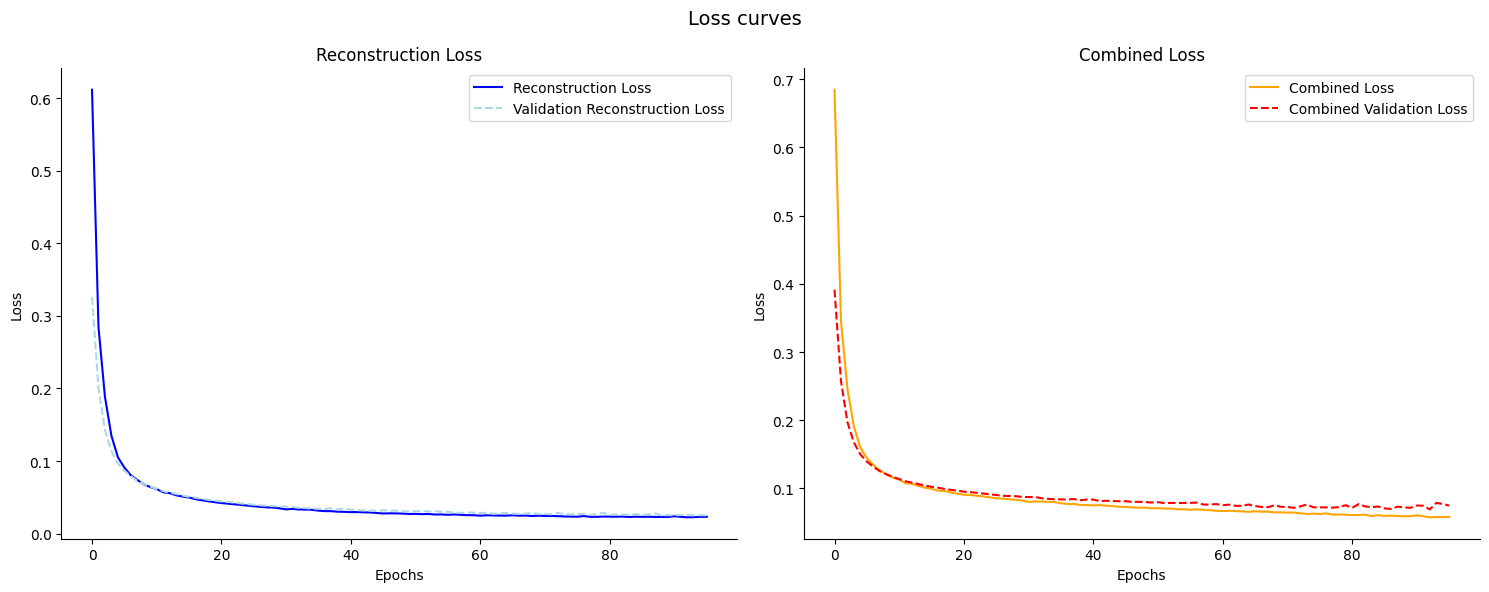

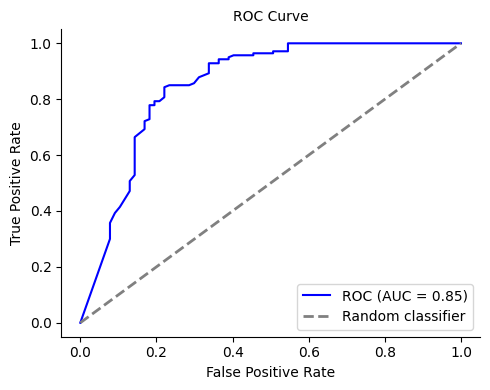

Limb: 2 Subject: 4 Youden Index: 0.5545454545454547 Sensitivity: 0.9571428571428572 Specificity: 0.5974025974025974
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.417
New best HP found: {'activation': 'relu', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.425
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeN

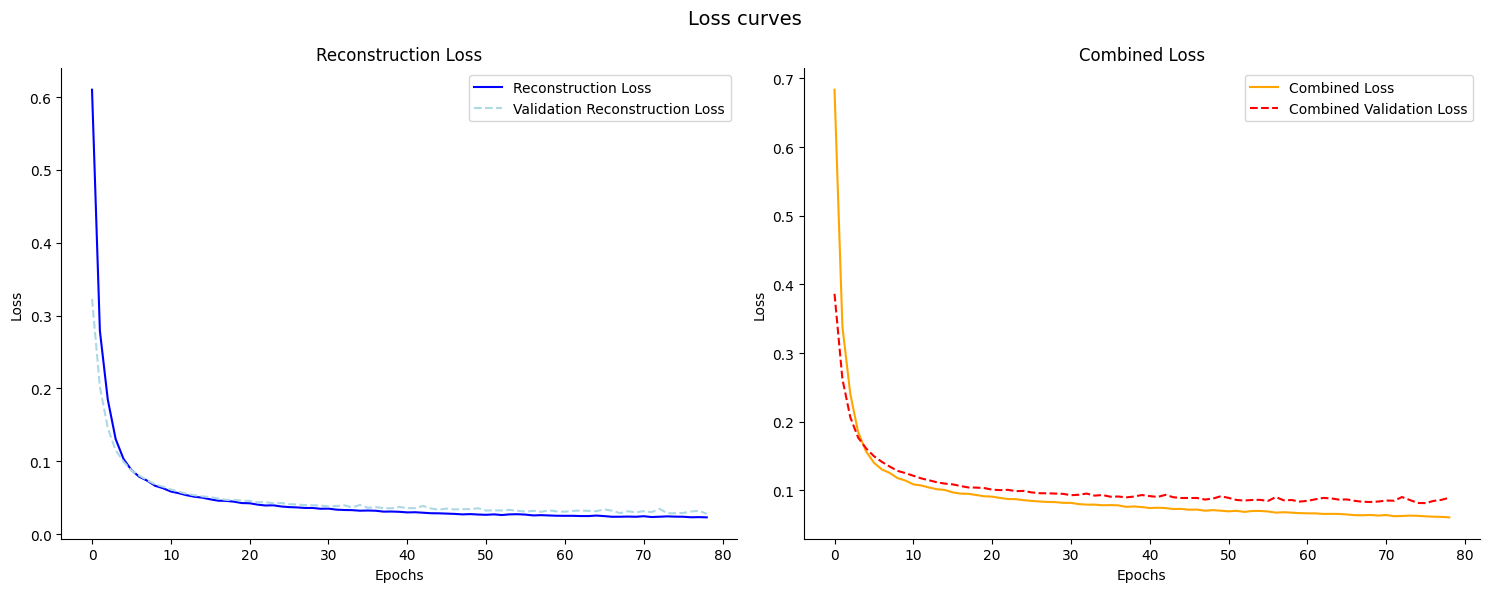

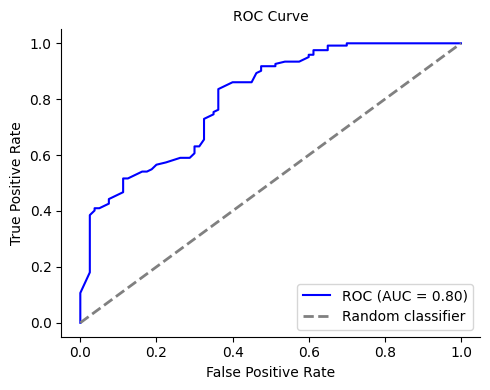

Limb: 2 Subject: 5 Youden Index: 0.41065573770491803 Sensitivity: 0.860655737704918 Specificity: 0.55
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.416
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.437


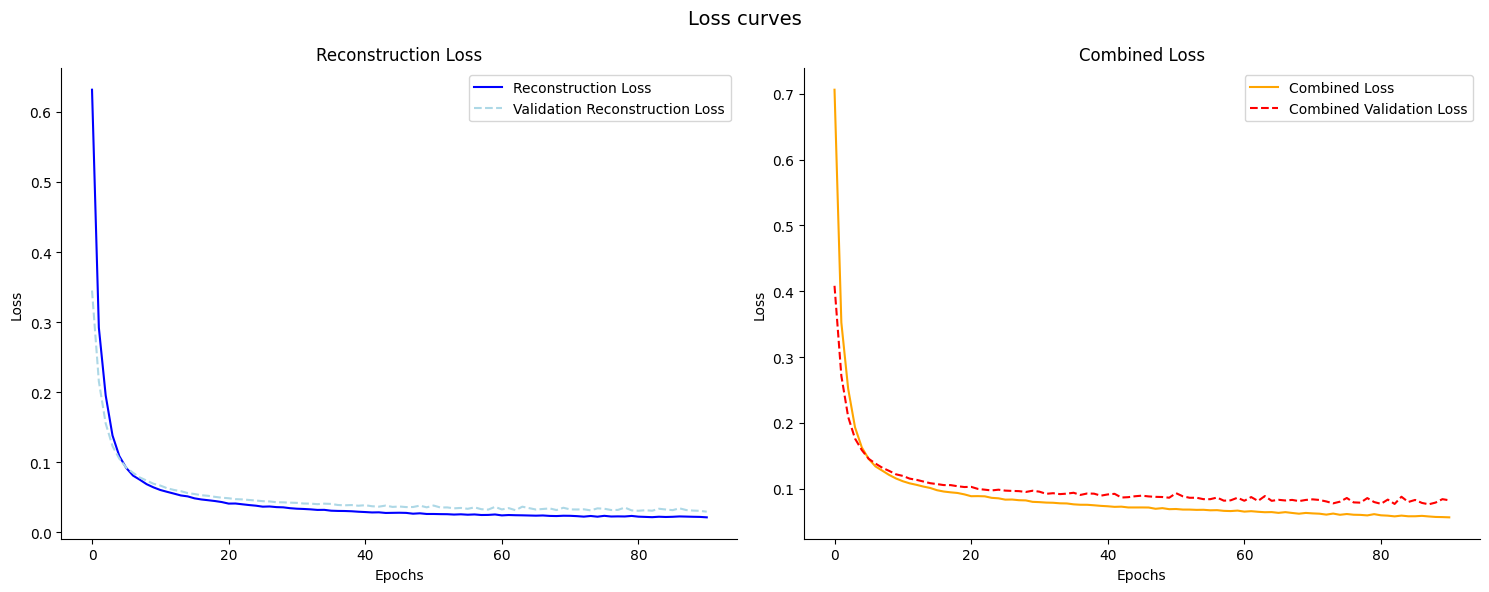

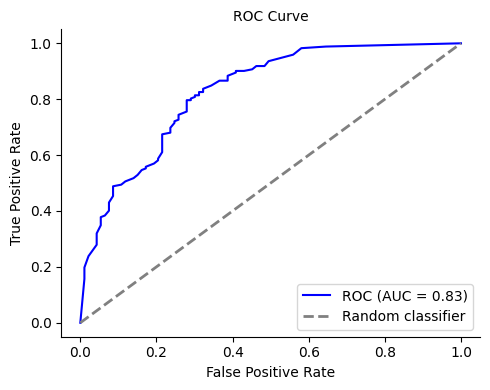

Limb: 2 Subject: 6 Youden Index: 0.48118279569892475 Sensitivity: 0.75 Specificity: 0.7311827956989247
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.435
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.447
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object 

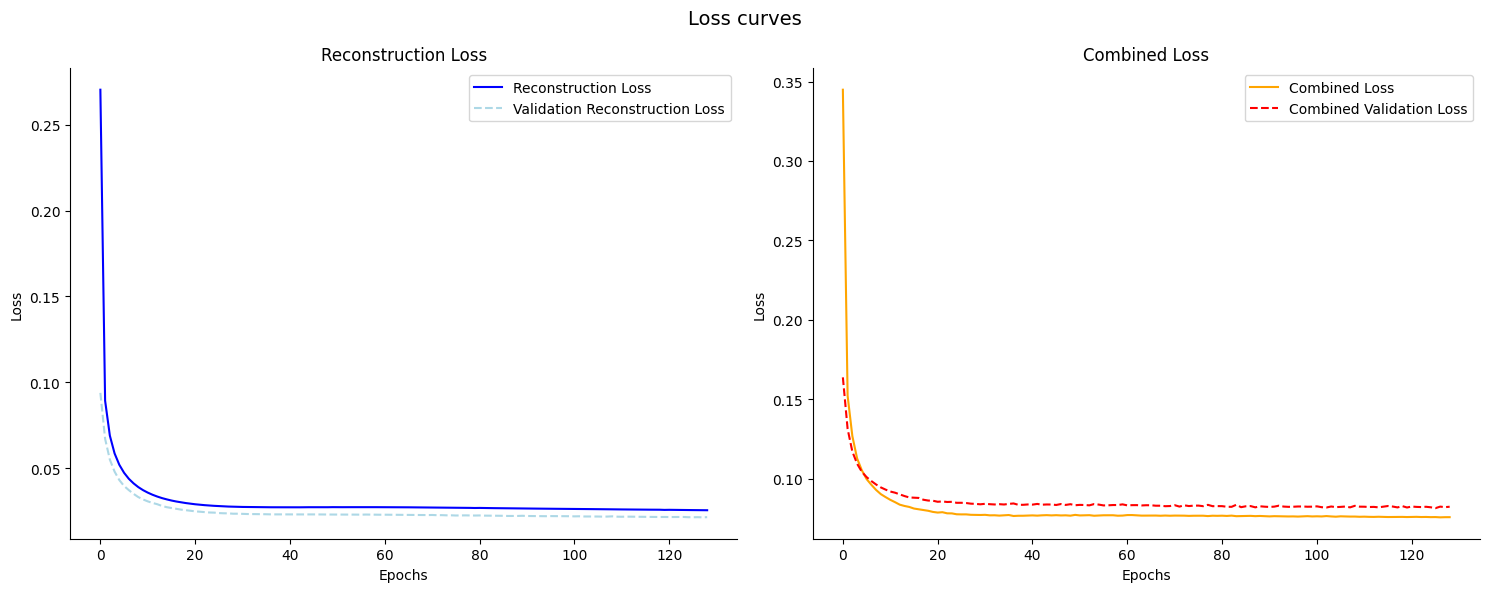

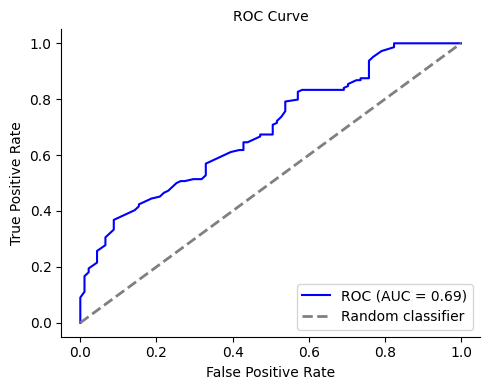

Limb: 2 Subject: 7 Youden Index: 0.20108363858363854 Sensitivity: 0.6736111111111112 Specificity: 0.5274725274725275
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.403
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.446


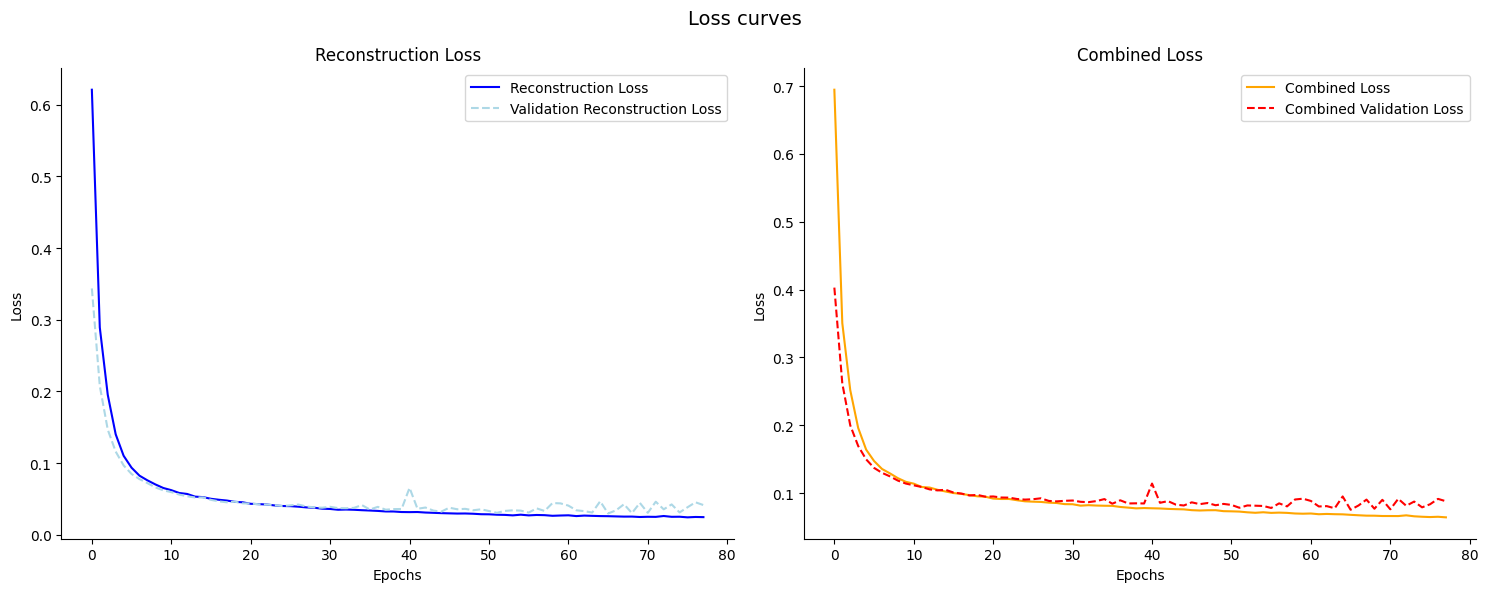

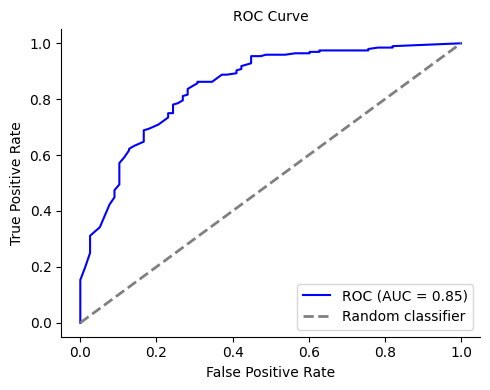

Limb: 2 Subject: 8 Youden Index: 0.48508634222919933 Sensitivity: 0.9081632653061225 Specificity: 0.5769230769230769
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.387
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.427


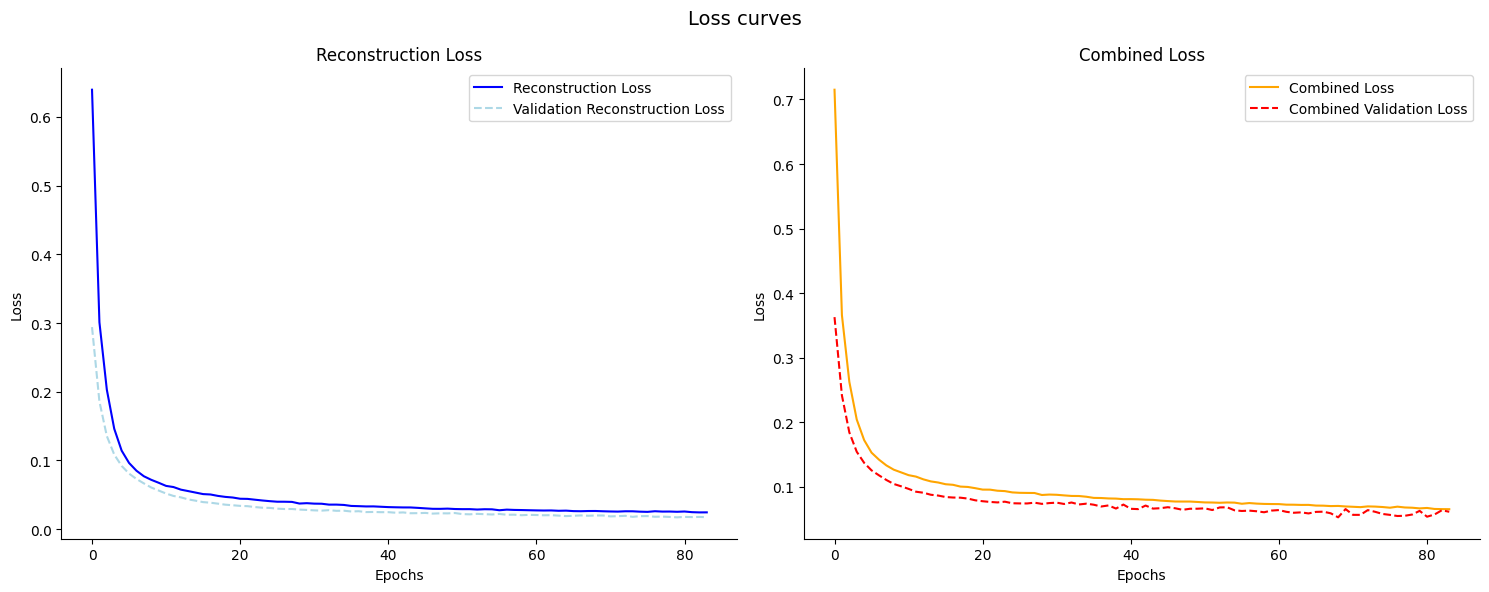

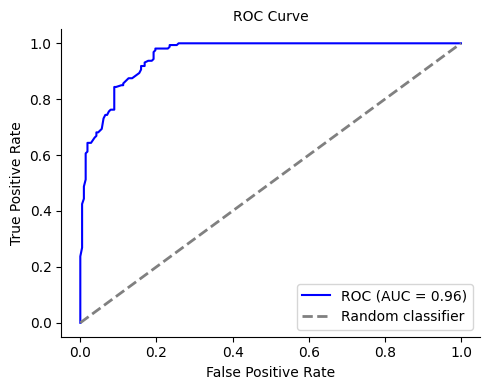

Limb: 2 Subject: 9 Youden Index: 0.6732981220657277 Sensitivity: 0.7625 Specificity: 0.9107981220657277
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.433
New best HP found: {'activation': 'relu', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x34482e550>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x3142b5670>, 'optimizer': 'nadam'} with score: 0.437
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x34482e520>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object

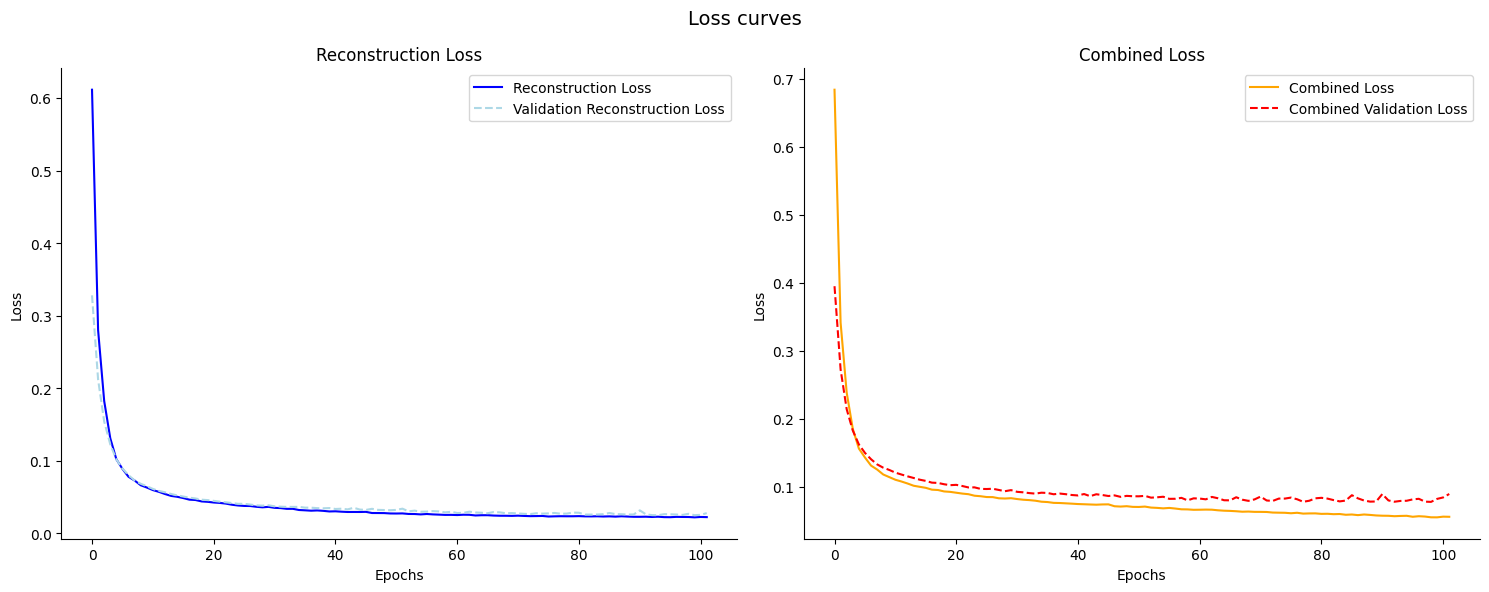

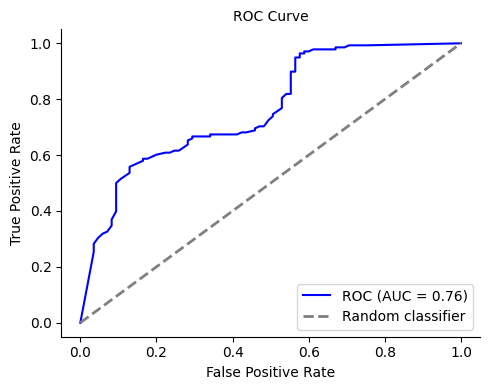

Limb: 2 Subject: 10 Youden Index: 0.22054560954816704 Sensitivity: 0.7028985507246377 Specificity: 0.5176470588235295
0.4323762250982871 0.14470862977603688


In [2]:
approach = 1
filename = f'../results/approach1/limb_nested_cv_left.csv'

window_size = 100
epochs = 200
batch_size = 32

#For approach1, supervised (class_loss = True), unsupervised (class_loss = False)
class_loss = True
plot_hist = True

X = left[['ax', 'ay', 'az']]
y = left['gnd']
subjects = left['subject']
limbs = left['limb']

hp_grid = {
    'activation': ['relu', 'tanh'],
    'kernel_init': [tf.keras.initializers.HeNormal(seed=42),
                    ],
    'bias_init': [tf.keras.initializers.Zeros()],
    'optimizer': ['nadam'],
    'loss': [tf.keras.losses.mean_squared_error,],
    'learning_rate': [0.0001],
    'batch_norm': [True, False]
} 

results_df, model, encoder, rf_model = run_nested_cv(window_size=window_size,
                           X=X,
                           y=y,
                           subjects=subjects,
                           limbs=limbs,
                           architecture=architecture,
                           hp_grid=hp_grid,
                           epochs=epochs,
                           batch_size=batch_size,
                           class_loss=class_loss,
                           plot_hist=plot_hist,
                           approach=approach)

# summary_results = results_df.groupby(['limb'] + list(hp_grid.keys()))['youden_index'].mean().reset_index()
# summary_results.to_csv(filename, index=False)
print(np.mean(results_df['youden_index']), np.std(results_df['youden_index']))

In [3]:
print(results_df[['subject', 'youden_index']])
print(f"Mean Youden Index:{np.mean(results_df['youden_index'])}")

   subject  youden_index
0        1      0.465232
1        2      0.540213
2        3      0.291919
3        4      0.554545
4        5      0.410656
5        6      0.481183
6        7      0.201084
7        8      0.485086
8        9      0.673298
9       10      0.220546
Mean Youden Index:0.4323762250982871


In [4]:

s_times = []

for i in subjects.unique():
    subject_n = i
    y_test_w, y_pred_w, subj_ids_w, limb_ids_w, time_taken = time_rf_inference_for_subject(subject_n, 
                                                                                           X, 
                                                                                           y, 
                                                                                           subjects, 
                                                                                           limbs, 
                                                                                           encoder, 
                                                                                           rf_model, 
                                                                                           window_size)
    
    s_times.append(time_taken)

print(f"Average inference time for subjects {subjects.unique()}: {np.mean(s_times)} seconds")


Average inference time for subjects [ 2  3  4  5  6  7  8  9 10  1]: 0.08895745277404785 seconds


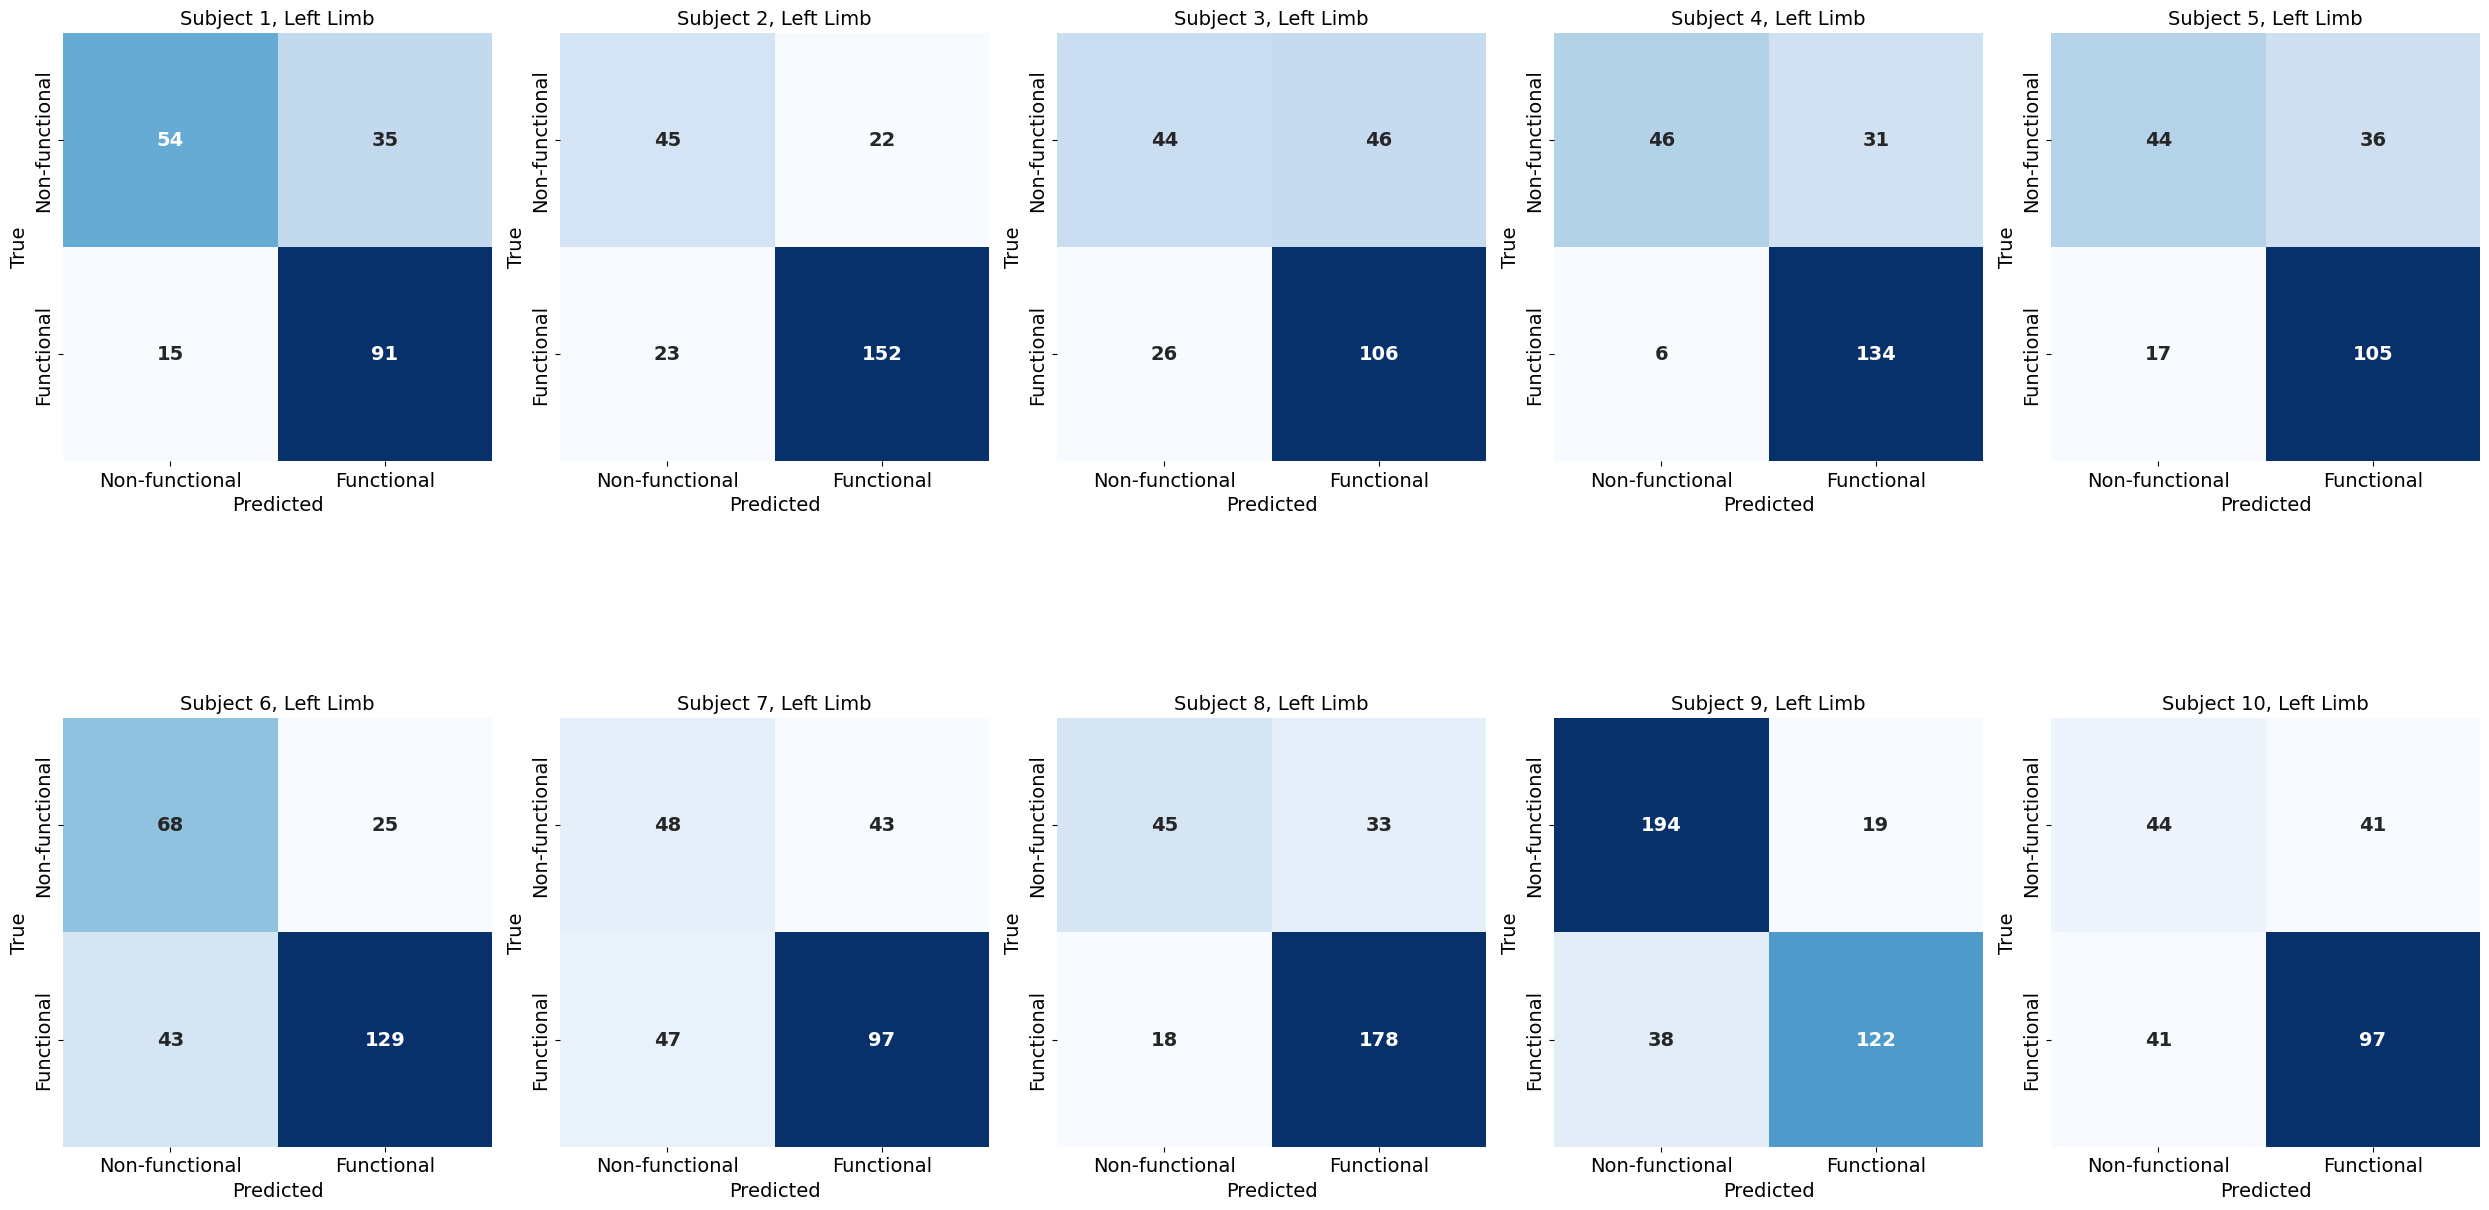

In [5]:
from plot import plot_confusion_matrix
cm = results_df['confusion_matrix']
plot_confusion_matrix(cm, limb = "Left")